# Network Modeling and Analysis with Python

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.research.its.qmul.ac.uk/bsw652/BUSM131_2021_22/blob/master/computer%20labs/session%2010/BUSM131_computer_lab10.ipynb)

In this 90 minutes tutorial, we will make a very brief introduction to network science, highlighting the basics of modeling approach and some key steps in descriptive network analysis.

Before we start we need to install some packages.

In [ ]:
pip install ipysigma networkx

Activate widget for network visualisation. Support for third party widgets will remain active for the duration of the session.

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

## Basics of Network Approach

We shall first start with establishing key notation and definitions. For the purposes of this tutorial, we will use **network** and **graph** interchangeably, referring to a collection of two sets $G=\left(N, E\right)$ with:
- $N$: set of nodes (vertices)
- $E$: set of links (edges)

We denote the cardinality of the nodes and edges sets, i.e. $|N|$ and $|V|$, as **network order** and **network size**, respectively.

A network is said to be **directed** if the links denote the direction of the connection, e.g. material flow from a supplier to a buyer. If the direction is not considered, it is called an **undirected** network.

Here is an exemplar network with arbitrary node labelling.
<img src="images/image1.png" style="width: 200px;"/>

Real-world networks, such as supply networks, are much bigger, hence can be described in terms of summary network statistics, which we will discuss later within the tutorial. Therefore, we talk about network topologies, that are used to classify and describe fundamental networks types and structures, such as the random graph below, where each pair of nodes are connected randomly and independent of each other with the same probability.
<div><img src="images/image2.png" style="width: 200px;"/><div/>

Network science has emerged as a complex systems interdisciplinary modeling approach that underlines the similarities in the structure and functioning of complex networks in different domains. This for instance helps us to model, learn, and analyse the resilience of supply chains in response to disruptions with its analogies to percolation on graphs.
    
Just to give some examples and a very brief historical account, the structure of social networks has a long history in social sciences, with one of the first mapped network of interpersonal relationships in a karate club by Zachary (1977), which highlighted the formation of clusters with a nice history of how these came to exist.

<div><img src="images/image3.png" style="width: 300px;"/><div/>
    
World wide web and social media provided a step change in collecting and analysing data on social network structure and functioning. For instance, Conover et al. (2011) were among the first to look at quantifying and visualising political polarity on social media. The current advances in data and methods are focusing on statistical inference in large-scale social network data.

<div><img src="images/image4.png" style="width: 300px;"/><div/>

Networks are ubiquitous and we can think of many systems as networks, i.e. a set of nodes and connections between them. Closest to the focus of the conference, we can think of transportation networks, electric grids, and supply networks as examples. Here is an illustration of an inbound supply network of a industrial manufacturer from Demirel et al. (2019), where nodes represent firms and links represent material flows.

<div><img src="images/image5.png" style="width: 500px;"/><div/>    

I would like to finally highlight a similarity with ecological networks, which have been highlighted in the literature but not fully explored and exploited for modeling and analysis. Below is a visualisation of an empirical food web for Crystal River Cree, which resembles a multi-tier supply chain.

<div><img src="images/image6.png" style="width: 200px;"/><div/>

## Network Analysis in Python

We will now start using Python for network analysis. There are two main network analysis packages in Python: `igraph` and `networkx`. We will stich to networkx but they have similar functionality and interface.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

We shall start with generating a very simple network by passing a list of edges.

In [2]:
edge_list = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 5),
             (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)]

G = nx.from_edgelist(edge_list)

Let's obtain the set of nodes, edges, network order, and network size

In [3]:
print(f'Nodes: {G.nodes} \nEdges: {G.edges}')

print(f'Network order: {G.order()} \nSize: {G.size()}')

Nodes: [1, 2, 3, 4, 5, 6, 7] 
Edges: [(1, 2), (1, 3), (2, 3), (2, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 6), (6, 7)]
Network order: 7 
Size: 10


We can check whether the graph is directed.

In [4]:
print(G.is_directed())

False


We can specify if we want to generate a directed graph. Undirected graph constructor is `Graph`, while the directed graph constructor is `DiGraph`.

In [5]:
G = nx.from_edgelist(edge_list, create_using=nx.DiGraph)
print(G.is_directed())

True


An alternative way of creating a graph from an edge list is directly passing it to the graph constructor as its data.

In [6]:
G = nx.DiGraph(edge_list)

We shall now plot this network for illustration. We can use the `draw` function for a simple plot with Matplotlib. We will look at more refined options later in the tutorial.

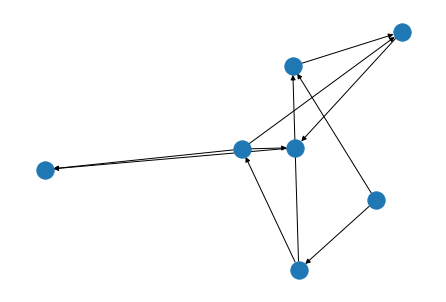

In [7]:
nx.draw(G)

We shall now create a toy supply chain with "PM" buying from "S1", "S2", "S3" and "S2" has a (second-tier) supplier "S4". For this, we will introduce a function that reads a list of paths (sequence of nodes connected with edges - without repeating nodes) and creates a network.

In [8]:
def create_graph_from_paths(paths, Constructor):
    G = Constructor()
    for path in paths:
        nx.add_path(G, path)
    return G

paths_list = [["S1", "PM"],
              ["S3", "PM"],
              ["S4", "S2", "PM"]]
G2 = create_graph_from_paths(paths_list, nx.DiGraph)

Let's now plot the network G2 with the `draw_networkx` function, which extends `draw` with labels and more options. We shall specify positions of nodes manually. We will look at layouts later.

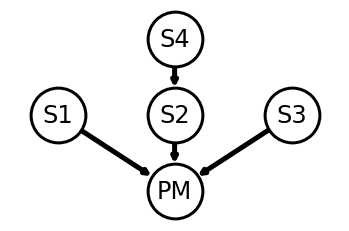

In [9]:
positions = {'PM': (0, 0), 'S1': (-1, 1.5), 'S2': (0, 1.5), 'S3': (1, 1.5), "S4": (0, 3)}

options = {
    "font_size": 24,
    "node_size": 3000,
    "node_color": "white",
    "edgecolors": "black",
    "linewidths": 3,
    "width": 5,
}
nx.draw_networkx(G2, positions, **options)

ax = plt.gca()
ax.margins(0.15)
plt.axis("off")
plt.show()

We shall now add a node "S5" add edges S5->S2, S5->S4, and remove the edge S3->PM.

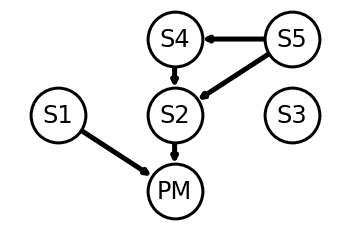

In [10]:
G2.add_node("S5")
G2.add_edges_from([("S5", "S2"), ("S5", "S4")])
G2.remove_edge("S3", "PM")

positions['S5'] = (1, 3)

nx.draw_networkx(G2, positions, **options)

ax = plt.gca()
ax.margins(0.15)
plt.axis("off")
plt.show()

## Read empirical network data

We will now start working with data. As an illustration, we will use secondary data collected by Thomas Choi and co-authors in a case study, which constitutes the first empirical supply network study and ignited research in this area. The example we use here is the Acura contractual relationship network from Choi & Hong (2002). You can find the nodes and edges lists as two csv files in the Github repository.

In [12]:
edge_list_file = './data/automan_links.csv'
acura_network = nx.read_edgelist(edge_list_file, nodetype=str, delimiter=',')

In [13]:
acura_network.nodes

NodeView(('Avery', 'Intek', 'C&C', 'Honda', 'Casco', 'Derby', 'Garden State', 'Harmony', 'HFI', 'Arkay', 'Honda Trading', 'Select Ind', 'Tobutsu', 'IPG', 'Iwata Bolt', 'J1', 'J3', 'J2', 'Jergens', 'JFC', 'Lipro', 'Master', 'Microtech', 'Miliken', 'Nhon', 'Piqua', 'S&M Tool', 'Twist', 'Sumitomo', 'Tenere', 'Topy', 'Wagner', 'West Michigan', 'World Class Plastics'))

In [14]:
acura_network.edges

EdgeView([('Avery', 'Intek'), ('Intek', 'Derby'), ('Intek', 'Harmony'), ('Intek', 'Arkay'), ('Intek', 'HFI'), ('Intek', 'Honda'), ('Intek', 'Select Ind'), ('Intek', 'Tobutsu'), ('Intek', 'Jergens'), ('Intek', 'Lipro'), ('Intek', 'Microtech'), ('Intek', 'Nhon'), ('Intek', 'Piqua'), ('Intek', 'West Michigan'), ('Intek', 'World Class Plastics'), ('C&C', 'Honda'), ('Honda', 'Casco'), ('Honda', 'Garden State'), ('Honda', 'Honda Trading'), ('Honda', 'IPG'), ('Honda', 'Iwata Bolt'), ('Honda', 'JFC'), ('Honda', 'Miliken'), ('Honda', 'Sumitomo'), ('Honda', 'Topy'), ('Honda', 'Wagner'), ('HFI', 'Arkay'), ('Arkay', 'Master'), ('Arkay', 'Select Ind'), ('Arkay', 'Tobutsu'), ('Arkay', 'Twist'), ('Select Ind', 'S&M Tool'), ('Select Ind', 'Twist'), ('Select Ind', 'Tenere'), ('Tobutsu', 'J2'), ('Iwata Bolt', 'J1'), ('Iwata Bolt', 'J3')])

## Network Constructs

We will now provide some definitions, which will form the basis of network statistics that we look at next.

### Adjacency matrix
Adjacency matrix $A=[A_{ij}]$ provides information on whether there is a link from node i to j, i.e. A_{ij}=1 if there is a link and A_{ij}=0, otherwise. The adjacency matrix is symmetric for undirected graphs. For weighted graphs, the entry represents the weight link, e.g. the value of goods contracted to be supplied by firm i to firm j.

In [15]:
adj_mat = nx.adjacency_matrix(acura_network)
print(adj_mat.todense())

[[0 1 0 ... 0 0 0]
 [1 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


### Neighbours, degree, and degree distribution

Neighbours of a node i, $N_i$, is the set of nodes adjacent to i. The degree of node i is the number of its neighbours, i.e. the cardinality of $N_i$. We distinguish between in-neighbours and out-neighbours in directed networks, hence in-degree and out-degree are defined accordingly. The degree distribution is the frequency distribution of the degrees of nodes in a network, which informs us about how similar / dissimilar nodes typically are in terms of their local neighbourhoods.

In [16]:
for node in acura_network.nodes:
    print(f'node {node} - neighbours: {list(acura_network.neighbors(node))} \n')

node Avery - neighbours: ['Intek'] 

node Intek - neighbours: ['Avery', 'Derby', 'Harmony', 'Arkay', 'HFI', 'Honda', 'Select Ind', 'Tobutsu', 'Jergens', 'Lipro', 'Microtech', 'Nhon', 'Piqua', 'West Michigan', 'World Class Plastics'] 

node C&C - neighbours: ['Honda'] 

node Honda - neighbours: ['C&C', 'Casco', 'Garden State', 'Honda Trading', 'Intek', 'IPG', 'Iwata Bolt', 'JFC', 'Miliken', 'Sumitomo', 'Topy', 'Wagner'] 

node Casco - neighbours: ['Honda'] 

node Derby - neighbours: ['Intek'] 

node Garden State - neighbours: ['Honda'] 

node Harmony - neighbours: ['Intek'] 

node HFI - neighbours: ['Arkay', 'Intek'] 

node Arkay - neighbours: ['HFI', 'Intek', 'Master', 'Select Ind', 'Tobutsu', 'Twist'] 

node Honda Trading - neighbours: ['Honda'] 

node Select Ind - neighbours: ['Intek', 'S&M Tool', 'Arkay', 'Twist', 'Tenere'] 

node Tobutsu - neighbours: ['Intek', 'J2', 'Arkay'] 

node IPG - neighbours: ['Honda'] 

node Iwata Bolt - neighbours: ['Honda', 'J1', 'J3'] 

node J1 - neighb

We shall now plot the degree distribution. As we can see, there are many firms with just one link, which is typically to Honda (car maker of the brand) or the supplier Intek, which manages many other suppliers.

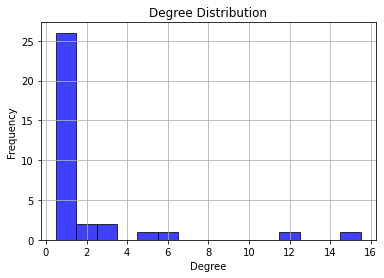

In [17]:
import numpy as np

degree_sequence = [degree for node, degree in acura_network.degree()]
max_degree = max(degree_sequence)
# Plot degree distribution
plt.hist(degree_sequence, bins=np.arange(0.5, max_degree + 1.5), alpha=0.75, color='b', edgecolor='black')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Network / Geodesic distance

Another important concept about networks is the distance between two nodes, which is characterised by the hops you need to take to get from a source node to a destination node. For this, we introduce the construct of **path**. A path between two nodes is a sequence of nodes where adjacent nodes are joined by a link (no links and nodes are repeated). A **shortest path** between two nodes is a path with minimum number of links. **Geodesic(network) distance** is the number of links on the shortest path between two nodes. We can then define the **dimater** of the graph as the maximum geodesic distance between any two nodes in the graph.

In [18]:
nx.shortest_path(acura_network, source='Honda', target='Select Ind')

['Honda', 'Intek', 'Select Ind']

The distance is then ...

In [19]:
nx.shortest_path_length(acura_network, source='Honda', target='Select Ind')

2

We can obtain the graph diameter by calling the `diameter` function.

In [20]:
acura_diameter = nx.diameter(acura_network)
acura_diameter

5

Let's check which source, destination pairs are furthest apart from each other

In [21]:
pair_distances = dict(nx.all_pairs_dijkstra_path_length(acura_network))
max_pairs = [(source, dest) for source, source_distances in pair_distances.items()
             for dest in source_distances if source_distances[dest] == acura_diameter]
print(max_pairs)

[('J1', 'Master'), ('J1', 'Twist'), ('J1', 'S&M Tool'), ('J1', 'Tenere'), ('J1', 'J2'), ('J3', 'Master'), ('J3', 'Twist'), ('J3', 'S&M Tool'), ('J3', 'Tenere'), ('J3', 'J2'), ('J2', 'J1'), ('J2', 'J3'), ('Master', 'J1'), ('Master', 'J3'), ('S&M Tool', 'J1'), ('S&M Tool', 'J3'), ('Twist', 'J1'), ('Twist', 'J3'), ('Tenere', 'J1'), ('Tenere', 'J3')]


A vertex i is said to be **reachable** from another vertex j if there exists a path from j to i. A graph is **connected** if all pairs of nodes are reachable from one another. For directed graphs, if we enforce the directions of the links, it is called strongly connected. Otherwise, it is called weakly connected.  

In [22]:
nx.is_connected(acura_network)

True

A network **component** is a maximally connected subgraph of a graph. The largest connected component is the one that attains the maximum size.

In [23]:
connected_components = list(nx.connected_components(acura_network))
largest_connected_component = sorted(connected_components, key=len, reverse=True)[0]
print(len(largest_connected_component))

34


## Network Centrality Metrics

We now move to descriptive statistics for networks, where we start with the concept of **centrality**, asking how central a node is within the extended network in which it is embedded.There are different notions of centrality.

**Degree centrality** is the degree of a node (or normalised version of that), which postulates that a node is central is it is linked to many others.

In [24]:
nx.degree_centrality(acura_network)

{'Avery': 0.030303030303030304,
 'Intek': 0.4545454545454546,
 'C&C': 0.030303030303030304,
 'Honda': 0.36363636363636365,
 'Casco': 0.030303030303030304,
 'Derby': 0.030303030303030304,
 'Garden State': 0.030303030303030304,
 'Harmony': 0.030303030303030304,
 'HFI': 0.06060606060606061,
 'Arkay': 0.18181818181818182,
 'Honda Trading': 0.030303030303030304,
 'Select Ind': 0.15151515151515152,
 'Tobutsu': 0.09090909090909091,
 'IPG': 0.030303030303030304,
 'Iwata Bolt': 0.09090909090909091,
 'J1': 0.030303030303030304,
 'J3': 0.030303030303030304,
 'J2': 0.030303030303030304,
 'Jergens': 0.030303030303030304,
 'JFC': 0.030303030303030304,
 'Lipro': 0.030303030303030304,
 'Master': 0.030303030303030304,
 'Microtech': 0.030303030303030304,
 'Miliken': 0.030303030303030304,
 'Nhon': 0.030303030303030304,
 'Piqua': 0.030303030303030304,
 'S&M Tool': 0.030303030303030304,
 'Twist': 0.06060606060606061,
 'Sumitomo': 0.030303030303030304,
 'Tenere': 0.030303030303030304,
 'Topy': 0.03030303030

In [25]:
sorted(nx.degree_centrality(acura_network).items(),
       key=lambda item: item[1], reverse=True)

[('Intek', 0.4545454545454546),
 ('Honda', 0.36363636363636365),
 ('Arkay', 0.18181818181818182),
 ('Select Ind', 0.15151515151515152),
 ('Tobutsu', 0.09090909090909091),
 ('Iwata Bolt', 0.09090909090909091),
 ('HFI', 0.06060606060606061),
 ('Twist', 0.06060606060606061),
 ('Avery', 0.030303030303030304),
 ('C&C', 0.030303030303030304),
 ('Casco', 0.030303030303030304),
 ('Derby', 0.030303030303030304),
 ('Garden State', 0.030303030303030304),
 ('Harmony', 0.030303030303030304),
 ('Honda Trading', 0.030303030303030304),
 ('IPG', 0.030303030303030304),
 ('J1', 0.030303030303030304),
 ('J3', 0.030303030303030304),
 ('J2', 0.030303030303030304),
 ('Jergens', 0.030303030303030304),
 ('JFC', 0.030303030303030304),
 ('Lipro', 0.030303030303030304),
 ('Master', 0.030303030303030304),
 ('Microtech', 0.030303030303030304),
 ('Miliken', 0.030303030303030304),
 ('Nhon', 0.030303030303030304),
 ('Piqua', 0.030303030303030304),
 ('S&M Tool', 0.030303030303030304),
 ('Sumitomo', 0.030303030303030304

**Closeness centrality**: A node is central if it is structurally close to many others, which gives quick access to information and resources. It is measured by the reciprocal of the average geodesic distance over all reachable, normalised by the network size, assuming it is connected.

In [26]:
sorted(nx.closeness_centrality(acura_network).items(),
       key=lambda item: item[1], reverse=True)

[('Intek', 0.6226415094339622),
 ('Honda', 0.559322033898305),
 ('Arkay', 0.44),
 ('Select Ind', 0.42857142857142855),
 ('Tobutsu', 0.4125),
 ('HFI', 0.4024390243902439),
 ('Avery', 0.38823529411764707),
 ('Derby', 0.38823529411764707),
 ('Harmony', 0.38823529411764707),
 ('Jergens', 0.38823529411764707),
 ('Lipro', 0.38823529411764707),
 ('Microtech', 0.38823529411764707),
 ('Nhon', 0.38823529411764707),
 ('Piqua', 0.38823529411764707),
 ('West Michigan', 0.38823529411764707),
 ('World Class Plastics', 0.38823529411764707),
 ('Iwata Bolt', 0.3793103448275862),
 ('C&C', 0.3626373626373626),
 ('Casco', 0.3626373626373626),
 ('Garden State', 0.3626373626373626),
 ('Honda Trading', 0.3626373626373626),
 ('IPG', 0.3626373626373626),
 ('JFC', 0.3626373626373626),
 ('Miliken', 0.3626373626373626),
 ('Sumitomo', 0.3626373626373626),
 ('Topy', 0.3626373626373626),
 ('Wagner', 0.3626373626373626),
 ('Twist', 0.3173076923076923),
 ('Master', 0.308411214953271),
 ('S&M Tool', 0.30275229357798167)

**Betweenness centrality**: A node is central if it is located between many other pairs of nodes, which makes the node critical for its gatekeeping role in communication within the network. It is the number of shortest paths a node belongs to normalised by the number of combinations.

In [27]:
sorted(nx.betweenness_centrality(acura_network).items(),
       key=lambda item: item[1], reverse=True)

[('Intek', 0.7698863636363636),
 ('Honda', 0.634469696969697),
 ('Select Ind', 0.14299242424242425),
 ('Iwata Bolt', 0.11931818181818182),
 ('Arkay', 0.10037878787878789),
 ('Tobutsu', 0.06060606060606061),
 ('Avery', 0.0),
 ('C&C', 0.0),
 ('Casco', 0.0),
 ('Derby', 0.0),
 ('Garden State', 0.0),
 ('Harmony', 0.0),
 ('HFI', 0.0),
 ('Honda Trading', 0.0),
 ('IPG', 0.0),
 ('J1', 0.0),
 ('J3', 0.0),
 ('J2', 0.0),
 ('Jergens', 0.0),
 ('JFC', 0.0),
 ('Lipro', 0.0),
 ('Master', 0.0),
 ('Microtech', 0.0),
 ('Miliken', 0.0),
 ('Nhon', 0.0),
 ('Piqua', 0.0),
 ('S&M Tool', 0.0),
 ('Twist', 0.0),
 ('Sumitomo', 0.0),
 ('Tenere', 0.0),
 ('Topy', 0.0),
 ('Wagner', 0.0),
 ('West Michigan', 0.0),
 ('World Class Plastics', 0.0)]

**Eigenvector centrality**: A node is central if it is a neighbor of many important nodes, a measure
of status/prestige/rank. It is the eigenvector of the leading eigenvalue for $Av=\lambda v$

In [28]:
sorted(nx.eigenvector_centrality(acura_network).items(),
       key=lambda item: item[1], reverse=True)

[('Intek', 0.6012581670321803),
 ('Arkay', 0.3383047588292368),
 ('Honda', 0.3034777505811554),
 ('Select Ind', 0.2674088872115081),
 ('Tobutsu', 0.22136883646456323),
 ('HFI', 0.21028062887623952),
 ('Twist', 0.13556253754294054),
 ('Avery', 0.1345658847830136),
 ('Derby', 0.1345658847830136),
 ('Harmony', 0.1345658847830136),
 ('Jergens', 0.1345658847830136),
 ('Lipro', 0.1345658847830136),
 ('Microtech', 0.1345658847830136),
 ('Nhon', 0.1345658847830136),
 ('Piqua', 0.1345658847830136),
 ('West Michigan', 0.1345658847830136),
 ('World Class Plastics', 0.1345658847830136),
 ('Master', 0.07571474409322589),
 ('Iwata Bolt', 0.0754841869612975),
 ('C&C', 0.06792174949248501),
 ('Casco', 0.06792174949248501),
 ('Garden State', 0.06792174949248501),
 ('Honda Trading', 0.06792174949248501),
 ('IPG', 0.06792174949248501),
 ('JFC', 0.06792174949248501),
 ('Miliken', 0.06792174949248501),
 ('Sumitomo', 0.06792174949248501),
 ('Topy', 0.06792174949248501),
 ('Wagner', 0.06792174949248501),
 ('

## Network cohesion
In addition to how central nodes are, we are generally interested in the extent to which some selected groups of nodes are cohesive. Do partners of a given firm tend to be partners with each other? **Clustering coefficient** is the fraction of transitive triplets.

In [29]:
sorted(nx.clustering(acura_network).items(),
       key=lambda item: item[1], reverse=True)

[('HFI', 1.0),
 ('Twist', 1.0),
 ('Tobutsu', 0.3333333333333333),
 ('Arkay', 0.26666666666666666),
 ('Select Ind', 0.2),
 ('Intek', 0.02857142857142857),
 ('Avery', 0),
 ('C&C', 0),
 ('Honda', 0),
 ('Casco', 0),
 ('Derby', 0),
 ('Garden State', 0),
 ('Harmony', 0),
 ('Honda Trading', 0),
 ('IPG', 0),
 ('Iwata Bolt', 0),
 ('J1', 0),
 ('J3', 0),
 ('J2', 0),
 ('Jergens', 0),
 ('JFC', 0),
 ('Lipro', 0),
 ('Master', 0),
 ('Microtech', 0),
 ('Miliken', 0),
 ('Nhon', 0),
 ('Piqua', 0),
 ('S&M Tool', 0),
 ('Sumitomo', 0),
 ('Tenere', 0),
 ('Topy', 0),
 ('Wagner', 0),
 ('West Michigan', 0),
 ('World Class Plastics', 0)]

## Network visualisation
We now illustrate visualising networks in Python. In network visualisation, you select a layout according to which you want your nodes to be placed. This involves placing them on a ring, tree-like structure, or on a plane simulating a spring system that minimises energy. It is generally insightful to set the nodes sizes in proportion to some metric (firm size, centrality, etc.) and colour them with respect to an attribute, e.g. company type or country. We shall now plot the automotive network, adjusting the node sizes in proportion to their degree and colour them according to betweenness centrality.

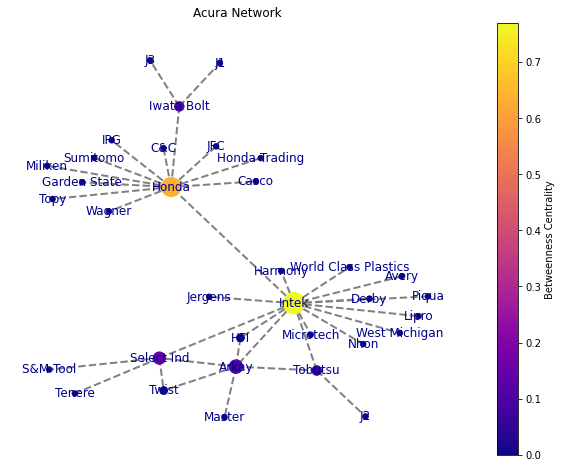

In [30]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors

nx.set_node_attributes(acura_network, nx.degree_centrality(acura_network), 'degree')
nx.set_node_attributes(acura_network, nx.betweenness_centrality(acura_network), 'betweenness')

scaling_factor = 1000
node_size = [data['degree'] * scaling_factor for node, data in acura_network.nodes(data=True)]

node_colour_var = [data['betweenness'] for node, data in acura_network.nodes(data=True)]
normalize = mcolors.Normalize(vmin=min(node_colour_var), vmax=max(node_colour_var))
node_colours = [cm.plasma(normalize(val)) for val in node_colour_var]

positions = nx.spring_layout(acura_network)
options = {
    'node_color': node_colours,
    'edge_color': 'gray',
    'node_size': node_size,
    'font_size': 12,
    'font_color': 'darkblue',
    'node_shape': 'o',
    'width': 2,
    'style': 'dashed',
    'with_labels': True
}

plt.figure(figsize=(8, 6))
nx.draw(acura_network, positions, **options)
plt.title('Acura Network')
plt.colorbar(cm.ScalarMappable(norm=normalize, cmap=cm.plasma), label='Betweenness Centrality')
plt.show()

When we want to visualise large networks, networkx layout implementation takes too long to converge and its static nature makes it very hard to inspect. There are several alternatives for network visualisation, including the ipysigma package that provides an Python interface to Sigma.js (Java script library for network visualisation).

Let's now work with an anonymised large scale supply network data.

In [31]:
from ipysigma import Sigma
edge_list_file = './data/SN_data.csv'
SN = nx.read_edgelist(edge_list_file, nodetype=str, delimiter=',')

sigma = Sigma(
    SN,
    node_metrics={"community": {"name": "louvain", "resolution": 1.5}},
    node_color='community',
    node_size = SN.degree,
    node_size_range=(3, 20),
    max_categorical_colors=30,
    default_edge_type='curve',
    node_border_color_from='node',
    default_node_label_size=14,
    layout_settings={'barnesHutOptimize':True, 'iterations':200, 'scalingRatio':2.0}
)


sigma

Sigma(nx.Graph with 1,997 nodes and 2,970 edges)